## Build square polytope
Build square polytope to replace randomized voronoi polytope
The basic process would be
1. Make a grid frame that will enclose each region of polytope
2. Get the vertices of each region
3. Get the regional points where data of interest falls within each region of polytope

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path

Equation would be for N number of squares, the total number of vertices that will be needed is ((N/2)+1)**2

In [2]:
def vertice_number(N):
    tot = (int(N**(1/2))+1)**2
    return tot

def draw_vertice(N, rng=1):
    tot = vertice_number(N)
    n = int(tot**(1/2))
    xx = np.linspace(start=-rng, stop=rng, num=n)

    x, y = np.meshgrid(xx, xx)
    sample = np.c_[x.ravel(), y.ravel()]

    return sample

#### Draw grid vertices for 64 polytopes

In [3]:
grid = draw_vertice(N=64)

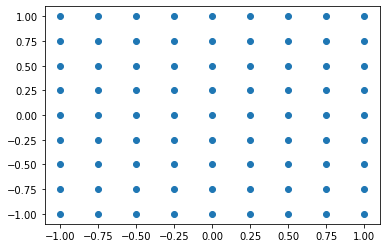

In [4]:
plt.scatter(grid[:,0],grid[:,1])

#### Region derivation
Given that we have 9-by-9 grid, the grid index naturally goes from bottom left to top right. Thus, the vertices of the first region (the bottom left) would be [0,1,9,10]. The final product would then be [9,9,0,1,10,10] for `plt.Path`. If convention not followed otherwise it only fills half of the given region.

In [5]:
# filling grid simulation
grid_fill = draw_vertice(N=10000)
grid_fill.shape

(10201, 2)

In [6]:
def get_regions(grid):
    t = int(grid.shape[0]) #total number of vertices
    l = int(grid.shape[0]**(1/2)) #length of each side
    antimask = [(l-1)+l*i for i in range(l-1)] #get anti-mask for non-corner points
    mask = [i for i in range(t-1) if i not in antimask]
    coor = []
    for cd in mask:
        if cd < t-l:
            coor.append([
                cd+l,
                cd+l,
                cd,
                cd+1,
                cd+l+1,
                cd+l+1
            ])
    return coor
    # return np.array([n for i,n in enumerate(grid) if i not in mask and i < t-l]) #get actual coordinates

In [7]:
def get_regional_points(grid, grid_fill, regions):
    rp = []
    for region in regions:
        p = Path(grid[region], closed=False)
        rp.append(grid_fill[p.contains_points(points=grid_fill)])

    return rp

In [8]:
regions = get_regions(grid)

In [9]:
rp = get_regional_points(grid=grid, grid_fill=grid_fill, regions=regions)

#### Demonstration of single region filling

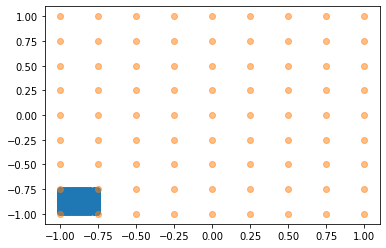

In [10]:
plt.scatter(x=rp[0][:,0],y=rp[0][:,1])
plt.scatter(x=grid[:,0],y=grid[:,1],alpha=0.5)

#### The final product of all regional points assigned to each corresponding region

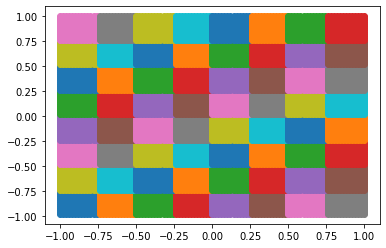

In [11]:
for r in rp:
    plt.scatter(r[:,0],r[:,1])